Experiment Number: 6

Roll No: C018

Student Name: Dhruvit Jain

Program/Branch/Sem: B.TECH ExTC Sem 7

Date of Performance: 08/08/2020

Date of Submission: 08/08/2020


Aim:To write a program in PYTHON to implement transform coding for the given example

Subject: MMSC

In [95]:
import matplotlib.pyplot as plt
import  math
import numpy as np
import array

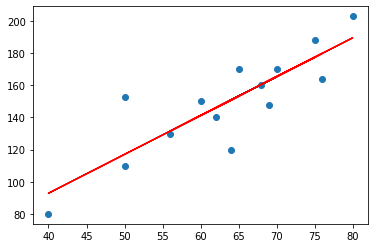

In [96]:
x0 = np.array([65,75,60,70,56,80,68,50,40,50,69,62,76,64])
x1 = np.array([170,188,150,170,130,203,160,110,80,153,148,140,164,120])
plt.scatter (x0,x1)
m,b=np.polyfit(x0,x1,1)
plt.plot (x0,m*x0+b,'r')
#slope and constant #polyfit for best fit curve

In [97]:
#find phi i.e tan inverse of slope 
m=2.5
s=math.atan(m)
s

1.1902899496825317

In [98]:
#Transformation matrix
A = np.array([[math.cos(s),math.sin(s)], [-math.sin(s),math.cos(s)]])
A

array([[ 0.37139068,  0.92847669],
       [-0.92847669,  0.37139068]])

In [99]:
#to find theta = Ax
a=list(zip(x0,x1))
for i in range(0,len(a)):
    a[i]= list(a[i])


theta =[]
for i in range (0,len(a)):
    t1= A.dot(a[i]).astype(int)
    theta.append(t1)
    
for i in range (0,len(theta)):
    theta[i]=theta[i].tolist()

theta0=[]
theta1=[]

for i in range (0,len(theta)):
    theta0.append(theta[i][0])
    theta1.append(theta[i][1])
    
print (theta0)
print (theta1)

[181, 202, 161, 183, 141, 218, 173, 120, 89, 160, 163, 153, 180, 135]
[2, 0, 0, -1, -3, 1, -3, -5, -7, 10, -9, -5, -9, -14]


In [100]:
#To achieve compression, discard theta1
#CR = 28/14=2


In [101]:
#For decompression, make t1=0

for i in range (0,len(theta1)):
    theta1[i]=0
print (theta1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [102]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.37139068, -0.92847669],
       [ 0.92847669,  0.37139068]])

In [103]:
b=list(zip(theta0,theta1))
for i in range(0,len(b)):
    b[i]= list(b[i])


xbar =[]
for i in range (0,len(b)):
    t1= Ainv.dot(b[i]).astype(int)
    xbar.append(t1)


for i in range (0,len(xbar)):
    xbar[i]=xbar[i].tolist()


x0inv=[]
x1inv=[]

for i in range (0,len(xbar)):
    x0inv.append(xbar[i][0])
    x1inv.append(xbar[i][1])
    
print (x0inv)
print (x1inv)

[67, 75, 59, 67, 52, 80, 64, 44, 33, 59, 60, 56, 66, 50]
[168, 187, 149, 169, 130, 202, 160, 111, 82, 148, 151, 142, 167, 125]


In [104]:
#MSE
# x0 = np.array([65,75,60,70,56,80,68,50,40,50,69,62,76,64])
# x0inv = np.array(x0inv)


MSEHeight = (np.square(np.subtract(x0,x0inv)))
print (MSEHeight.mean())
MSEWeight = (np.square(np.subtract(x1,x1inv)))
print (MSEWeight.mean())


44.642857142857146
6.071428571428571


CONCLUSION : 

Basic idea of transform coding is to compact most information in a source sequence into a few elements of the transformed sequence using reversible transform and then discarding the elements of the sequence that do not contain much information to obtain compression. Maximum compaction can be obtained if the transform used can decorrelate the input sequence. This is a lossy method of compression as we are discaring an entire vector and hence, the compression ratio is 2 here. Then, we calculate the mean square error for both the recovered values. 